In [1]:
# Import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset.
diabetes= pd.read_csv('diabetes-data.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dimension of the dataset.
diabetes.shape

(768, 9)

In [5]:
# Visualizing the datatype of data.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Checking the null values.
diabetes.isnull().sum()
# There is no null value present in the data.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Data analysis.
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Zero value count.
(diabetes==0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
# Outcome analysis
diabetes.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

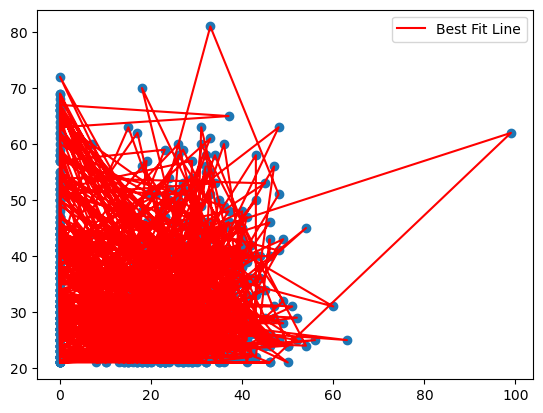

In [33]:
plt.scatter(x = diabetes["SkinThickness"], y = diabetes['Age'])
plt.plot(diabetes["SkinThickness"], diabetes['Age'], color = 'r', label = "Best Fit Line")
plt.legend()
plt.show()

In [34]:
from sklearn.preprocessing import scale

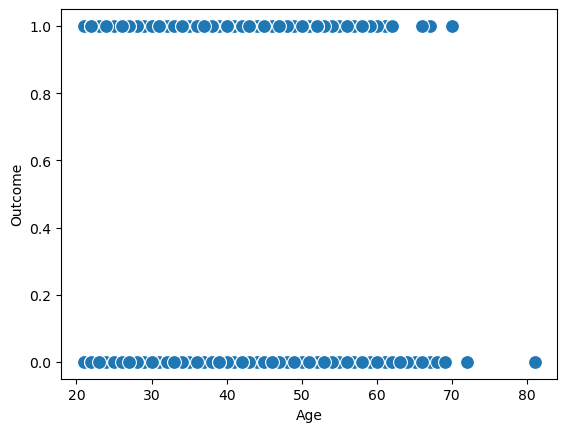

In [39]:
sns.scatterplot(x=diabetes.Age, y=diabetes['Outcome'], s=100); 
plt.show()

In [41]:
X = scale(diabetes.BloodPressure, with_mean=True, with_std=False ).reshape(-1, 1)
y = diabetes.Outcome 

In [43]:
X[0:5]

array([[  2.89453125],
       [ -3.10546875],
       [ -5.10546875],
       [ -3.10546875],
       [-29.10546875]])

In [44]:
X.mean()

0.0

In [45]:
print(diabetes.BloodPressure)

0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64


In [46]:
X.std()

19.343201628981696

In [47]:
import sklearn.linear_model as skl_lm

In [49]:
regr= skl_lm.LinearRegression()

In [50]:
regr.fit(X,y)

LinearRegression()

In [51]:
regr.intercept_

0.3489583333333333

In [52]:
regr.coef_

array([0.00160337])

In [53]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2) 


In [54]:
min_rss

173.74044082089506

In [55]:
regr= skl_lm.LinearRegression()

In [56]:
X= diabetes.BloodPressure.values.reshape(-1,1)

In [57]:
y= diabetes.Outcome

In [58]:
regr.fit(X,y)

LinearRegression()

In [59]:
regr.intercept_

0.2381569722458638

In [60]:
regr.coef_

array([0.00160337])

In [62]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - 
y.values.reshape(-1,1))**2)
min_rss

173.7404408208951

In [63]:
mse=min_rss/len(y)
mse

0.22622453231887382

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
Outcome_pred= regr.predict(X)

In [66]:
r2_score(y, Outcome_pred)

0.004233891414571533

In [67]:
mean_squared_error(y,Outcome_pred)

0.22622453231887382

In [68]:
import statsmodels.formula.api as smf

In [69]:
est= smf.ols('Outcome~BloodPressure', diabetes).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.257
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0715
Time:                        21:56:41   Log-Likelihood:                -519.03
No. Observations:                 768   AIC:                             1042.
Df Residuals:                     766   BIC:                             1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2382      0.064      3.735      0.000       0.113       0.363
BloodPressure     0.0016      0.001      1.805      0.072      -0.000       0.003
==============================================================================
Omnibus:                     4714.366   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.221
Skew:                           0.632   Prob(JB):                     3.20e-29
Kurtosis:                       1.419   Cond. No.                         266.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
est.params

Intercept        0.238157
BloodPressure    0.001603
dtype: float64

In [71]:
# RSS
((diabetes.Outcome - (est.params[0] + est.params[1] * diabetes.BloodPressure))**2).sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_2196\1334554485.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ((diabetes.Outcome - (est.params[0] + est.params[1] * diabetes.BloodPressure))**2).sum()


173.7404408208951

In [73]:
((diabetes.Outcome - (est.params[0] + est.params[1]*diabetes.BloodPressure))** 
2).sum()/len(diabetes.Outcome)

C:\Users\hp\AppData\Local\Temp\ipykernel_2196\3667826507.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ((diabetes.Outcome - (est.params[0] + est.params[1]*diabetes.BloodPressure))**


0.22622453231887382

In [75]:
est=smf.ols('Outcome~Glucose', diabetes).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4925      0.060     -8.262      0.000      -0.610      -0.375
Glucose        0.0070      0.000     14.600      0.000       0.006       0.008


In [76]:
est=smf.ols('Outcome~BMI', diabetes).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2175      0.069     -3.159      0.002      -0.353      -0.082
BMI            0.0177      0.002      8.472      0.000       0.014       0.022


In [78]:
est=smf.ols('Outcome~Glucose+BMI', diabetes).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           9.87e-50
Time:                        22:11:25   Log-Likelihood:                -407.38
No. Observations:                 768   AIC:                             820.8
Df Residuals:                     765   BIC:                             834.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7987      0.076    -10.485      0.000      -0.948      -0.649
Glucose        0.0063      0.000     13.209      0.000       0.005       0.007
BMI            0.0121      0.002      6.230      0.000       0.008       0.016
==============================================================================
Omnibus:                       58.698   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.601
Skew:                           0.493   Prob(JB):                     2.07e-10
Kurtosis:                       2.350   Cond. No.                         661.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
est=smf.ols('Outcome~BMI+Glucose', diabetes).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7987      0.076    -10.485      0.000      -0.948      -0.649
BMI            0.0121      0.002      6.230      0.000       0.008       0.016
Glucose        0.0063      0.000     13.209      0.000       0.005       0.007


In [80]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
